# VC Dimension

##### The Maximum number of points h that can be arranged such that f(x) can shatter them

##### For a straight line classifier of d dimensions with an intercept: VC Dimension = d + 1

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
def plot_db(X,y,w,b, x_min=-1, y_min=-1, x_max=10, y_max=10):

    xx = np.linspace(x_min, x_max)
    a = -w[0]/w[1]
    yy = a*xx - (b)/w[1]
    margin = 1 / np.sqrt(np.sum(w**2))
    yy_neg = yy - np.sqrt(1 + a**2) * margin
    yy_pos = yy + np.sqrt(1 + a**2) * margin
    plt.figure(figsize=(8, 8))
    plt.plot(xx, yy, "b-")
    # plt.plot(xx, yy_neg, "m--")
    # plt.plot(xx, yy_pos, "m--")
    colors = ["red", "green"]
    plt.scatter(X[:, 0], X[:, 1], s=100, c=y.ravel(), alpha=0.5, cmap=matplotlib.colors.ListedColormap(colors), edgecolors="black")
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    plt.show()

### In case of two dimensions:
1. Classifying <b>One</b> point:
> <b>Successful</b> (No Counterexample that can prove otherwise)

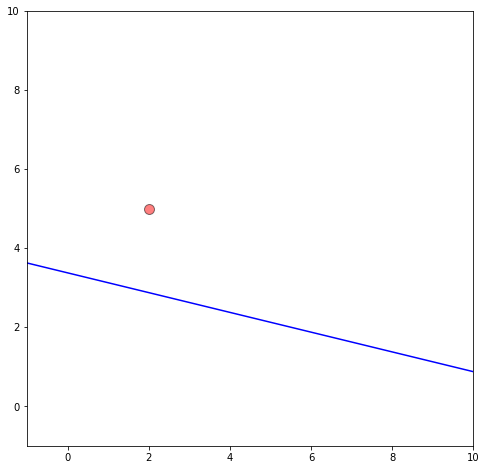

In [3]:
X = np.array([
    [1,1],
    [2,5],
])
y = np.array([-1,1])
clf = svm.SVC(kernel='linear')
clf.fit(X, y.ravel())
w = clf.coef_[0]
b = clf.intercept_
plot_db(X[1:],y[1:],w,b)

2. Classifying <b>Two</b> points: <b>Successful</b> (No Counterexample that can prove otherwise)

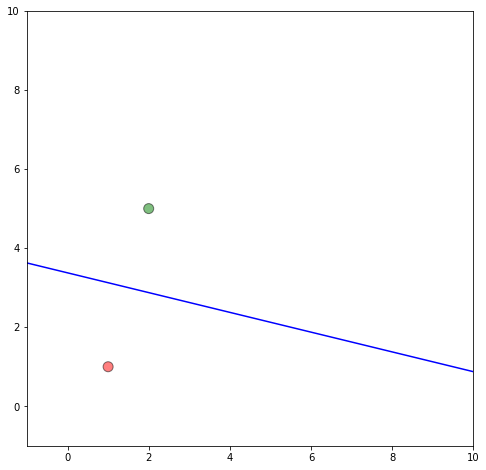

In [4]:
plot_db(X,y,w,b)

3. Classifying <b>Three</b> points:
> <b>Successful</b> (No Counterexample that can prove otherwise)

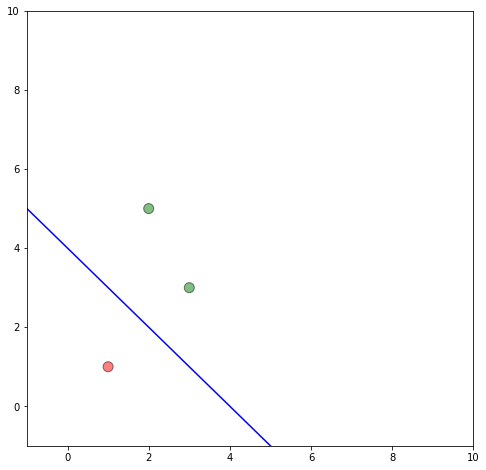

In [5]:
X = np.array([
    [1,1],
    [2,5],
    [3,3],
])
y = np.array([-1,1, 1])
clf.fit(X, y.ravel())
w = clf.coef_[0]
b = clf.intercept_
plot_db(X,y,w,b)

In [6]:
X = np.array([
    [1,7],
    [2,5],
    [3,8],
    [4,6],
])
y = np.array([-1,-1,1,-1])



clf = svm.SVC(kernel="linear", C=100)
clf.fit(X, y.ravel())
w = clf.coef_[0]
b = clf.intercept_
print("W:", w)
print("b:", b)
old_w = w
old_b = b

W: [0.4 1.2]
b: [-9.8]


4. Classifying <b>Four</b> points:
> Can be successful in some cases

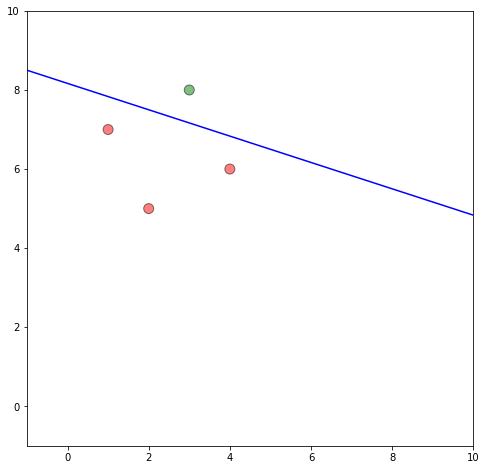

In [7]:
plot_db(X,y,w,b)

### Counterexample:
> The SVM will fail to classify these four points

In [8]:
X = np.array([
    [1,7],
    [2,5],
    [3,8],
    [4,6],
])
y = np.array([-1,1,1,-1])



clf = svm.SVC(kernel="linear", C=100)
clf.fit(X, y.ravel())
w = clf.coef_[0]
b = clf.intercept_
print("W:", w)
print("b:", b)

W: [0. 0.]
b: [-0.]


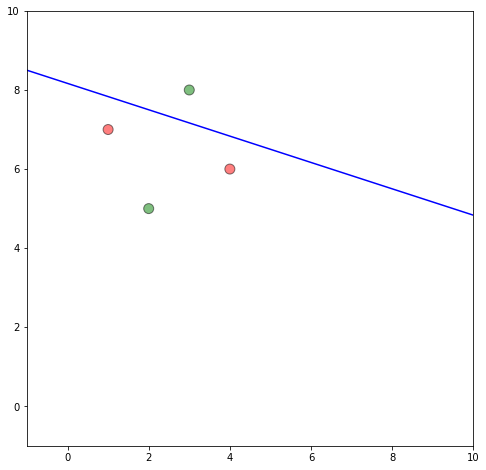

In [9]:
plot_db(X,y,old_w,old_b)

## Conclusion
> Since SVM can classify a maximum of three points with zero error given two dimensions
> <h3>VC Dimension = 3 = # of dimensions + 1</h3>

## Generalization Error

In [10]:
def get_data(filename):
    df = pd.read_csv(filename)
    df.color = df.color.replace(0, -1)
    X = df[['x', 'y']].to_numpy()  # iris_df[["petal length (cm)", "petal width (cm)"]].to_numpy()
    y = df['color'].to_numpy().reshape((-1, 1))  # iris_df[["target"]].to_numpy()
    return X, y

In [11]:
X,y = get_data('non-separable-data.csv')
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.3)
model = svm.SVC()
# train the model using the training data
model.fit(X_train, y_train.ravel())

# use cross-validation to estimate the generalization error
scores = cross_val_score(model, X_test, y_test.ravel(), cv=5)

# the generalization error is the average of the scores
generalization_error = 1 - np.mean(scores)
generalization_error

0.03335857247419294